<a href="https://colab.research.google.com/github/coda-nsit/kaggle/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 1.56MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.9MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.2MB/s]


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn import preprocessing

# Load the data

In [643]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Visualize the data

## Correlation between Survived and Cabin

,Cabin,Survived
0,-1,0
1,81,1
2,-1,1
3,55,1
4,-1,0


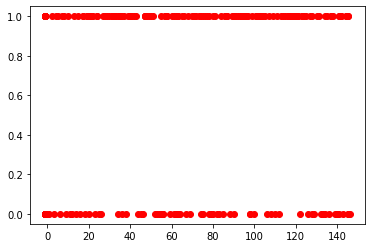

In [645]:

temp_df = data.loc[:, ["Cabin", "Survived"]]
temp_df['Cabin'] = temp_df['Cabin'].astype('category')
category_columns = temp_df.select_dtypes(['category']).columns
temp_df[category_columns] = temp_df[category_columns].apply(lambda x: x.cat.codes)
display(temp_df.head())
plt.plot(temp_df["Cabin"], temp_df["Survived"], 'ro')

## Experiment with Ticket column 

In [630]:
# No NAs in Ticket column and many ticket values are same
tickets = data["Ticket"]
print("total tickets:", len(tickets))
non_na_ticket_row = tickets.dropna()
print("total non-NAs:", len(non_na_ticket_row))
print("total unique non-NAs:", len(set(non_na_ticket_row)))

total tickets: 891
total non-NAs: 891
total unique non-NAs: 681


## Experiment with Cabin column

In [631]:
# Most Cabins are NA, so drop it
cabins = data["Cabin"]
print("total cabins:", len(cabins))
non_na_cabins_row = cabins.dropna()
print("total non-NAs:", len(list(non_na_cabins_row)))
print("total unique non-NAs:", len(set(non_na_cabins_row)))

total cabins: 891
total non-NAs: 204
total unique non-NAs: 147


## Experiment with Age

total cabins: 891
total non-NAs 714
total unique non-NAs 88


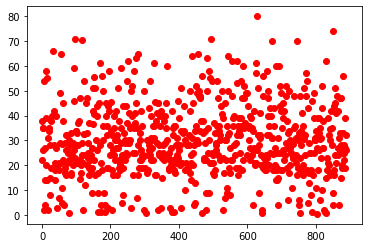

In [632]:
# Most Age are NA
ages = data["Age"]
print("total cabins:", len(ages))
non_na_ages_row = ages.dropna()
print("total non-NAs", len(list(non_na_ages_row)))
print("total unique non-NAs", len(set(non_na_ages_row)))
plt.plot(non_na_ages_row, 'ro')

# Preprocess the data

In [0]:
def preprocess_data(filename):
  data = pd.read_csv(filename)
  passenger_ids = data.loc[:, "PassengerId"]
  data = data.drop(columns=["Name", "PassengerId", "Cabin"], axis=1)
  
  # categorize the category columns
  data['Embarked'] = data['Embarked'].astype('category')
  data['Sex'] = data['Sex'].astype('category')
  data['Ticket'] = data['Ticket'].astype('category')
  category_columns = data.select_dtypes(['category']).columns
  data[category_columns] = data[category_columns].apply(lambda x: x.cat.codes)

  # fill age with median age
  data["Age"] = data["Age"].fillna(data["Age"].median())
  
  # normalize the columns: decreases the accuracy
  # min_max_scaler = preprocessing.MinMaxScaler()
  # data["Fare"] = min_max_scaler.fit_transform(data[["Fare"]].values.astype(float))
  return data, passenger_ids

In [634]:
data, _ = preprocess_data("train.csv")
X, y = data.drop(columns=["Survived"]), data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=np.random)
print(X_train.shape)
display(X_train.head())

(623, 8)


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
853,1,0,16.0,0,1,591,39.4000,2
118,1,1,24.0,0,1,585,247.5208,0
521,3,1,22.0,0,0,390,7.8958,2
15,2,0,55.0,0,0,153,16.0000,2
406,3,1,51.0,0,0,321,7.7500,2


# Train the model

In [635]:
model = ExtraTreesClassifier(n_estimators=100, random_state=np.random, min_samples_split=6)
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=6,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False,
                     random_state=<module 'numpy.random' from '/usr/local/lib/python3.6/dist-packages/numpy/random/__init__.py'>,
                     verbose=0, warm_start=False)

In [636]:
print(model.feature_importances_)
predictions = model.predict(X_val)

[0.11909431 0.39543436 0.10551277 0.0461141  0.04783706 0.12774666
 0.11690802 0.04135272]


In [637]:
f1_score(y_val, predictions)

0.7830188679245284

# Train with entire data
Once the hyper parameters have been decided train using the entire train.csv

In [607]:
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=6,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False,
                     random_state=<module 'numpy.random' from '/usr/local/lib/python3.6/dist-packages/numpy/random/__init__.py'>,
                     verbose=0, warm_start=False)

# Find predictions on the test.csv

In [611]:
X, passenger_ids = preprocess_data("test.csv")
display("before setting value of Fare", X[X.isnull().any(axis=1)])
X.loc[152, "Fare"] = 0
display("after setting the value of Fare", X[X.isnull().any(axis=1)])

predictions = model.predict(X)

'before setting value of Fare'

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,3,1,60.5,0,0,239,NaN,2


'after setting the value of Fare'

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [0]:
output = pd.DataFrame.from_records([(passenger_id, prediction) for passenger_id, prediction in zip(passenger_ids, predictions)], 
                                   columns=["PassengerId", "Survived"])

In [0]:
output.to_csv("output.csv", index=None)